In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        #print(os.path.join(dirname, filename))
print ('number of files in no folder', cnt)

cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/'):
    for filename in filenames:
        cnt+=1
        #print(os.path.join(dirname, filename))
print ('number of files in yes folder', cnt)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

number of files in no folder 98
number of files in yes folder 155


Look at images

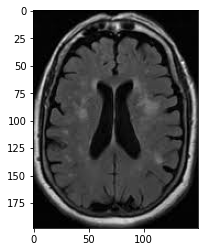

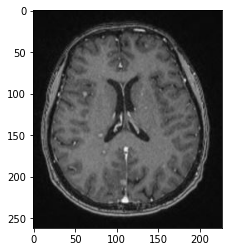

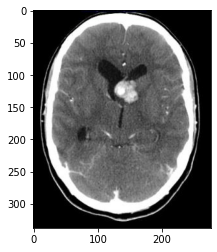

In [2]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        plt.imshow(img,cmap='gray')
        plt.show()
        if cnt > 2:
            break


<class 'numpy.ndarray'>


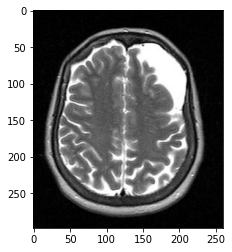

<class 'numpy.ndarray'>


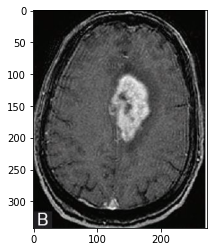

<class 'numpy.ndarray'>


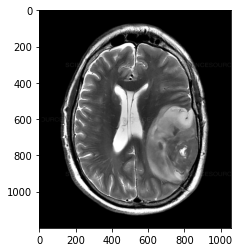

In [3]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        print (type(img))
        plt.imshow(img,cmap='gray')
        plt.show()
        if cnt > 2:
            break

In [4]:
#label for yes = 0, label for no = 1

desired_width = 228
desired_height = 228

img_list = []
label_list = []
cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (desired_width,desired_height))
        img_list.append(resized_img/255.0)
        label_list.append(0)        
        #print (type(img))
        #plt.imshow(img,cmap='gray')
        #plt.show()


print ('len(img_list)',len(img_list))
print ('len(label_list)',len(label_list))

len(img_list) 155
len(label_list) 155


In [5]:
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (desired_width,desired_height))
        img_list.append(resized_img/255.0)
        label_list.append(1)        
        #print (type(img))
        #plt.imshow(img,cmap='gray')
        #plt.show()


print ('len(img_list)',len(img_list))
print ('len(label_list)',len(label_list))

len(img_list) 253
len(label_list) 253


In [6]:
import numpy as np
img_list = np.asarray(img_list).astype(np.float32)
print (img_list.shape)

(253, 228, 228, 3)


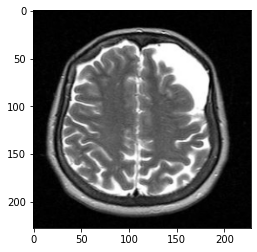

In [7]:
plt.imshow(img_list[0])

In [8]:
img_list[1].shape

(228, 228, 3)

In [9]:
label_list =np.asarray(label_list)
print (label_list.shape)

(253,)


In [10]:
label_list[:5]

array([0, 0, 0, 0, 0])

In [11]:
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

category_label = to_categorical(label_list,num_classes=2)
print(category_label[:5])
print(category_label[-5:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(img_list,category_label,test_size=0.3)

print ('x_train.shape',x_train.shape)

x_train.shape (177, 228, 228, 3)


In [13]:
y_train.shape

(177, 2)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Dense, Flatten, BatchNormalization, Dropout

brain_model = Sequential()
brain_model.add(Conv2D(32,5,input_shape=(228,228,3), activation='relu'))
brain_model.add(BatchNormalization())
brain_model.add(MaxPool2D(2,2))
brain_model.add(Dropout(0.5))

brain_model.add(Conv2D(64,5, activation='relu'))
brain_model.add(BatchNormalization())
brain_model.add(MaxPool2D(2,2))

brain_model.add(Dropout(0.5))

brain_model.add(Flatten())
brain_model.add(Dense(1000,activation='relu'))
brain_model.add(Dropout(0.5))
brain_model.add(Dense(500,activation='relu'))
brain_model.add(Dropout(0.5))
brain_model.add(Dense(2,activation='softmax'))

brain_model.summary()

brain_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

2022-08-23 16:48:08.385503: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 64)      51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 108, 108, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [15]:
# Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv2d (Conv2D)              (None, 224, 224, 32)      2432      
# _________________________________________________________________
# max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
# _________________________________________________________________
# flatten (Flatten)            (None, 401408)            0         
# _________________________________________________________________
# dense (Dense)                (None, 1000)              401409000 
# _________________________________________________________________
# dense_1 (Dense)              (None, 2)                 2002      
# =================================================================
# Total params: 401,413,434
# Trainable params: 401,413,434
# Non-trainable params: 0

In [16]:
#epochs=30
#brain_model.fit(x_train,y_train,epochs=epochs)


# Epoch 1/30
# 6/6 [==============================] - 14s 2s/step - loss: 90.2400 - accuracy: 0.5819
# Epoch 2/30
# 6/6 [==============================] - 13s 2s/step - loss: 48.5176 - accuracy: 0.6723
# Epoch 3/30
# 6/6 [==============================] - 14s 2s/step - loss: 23.8906 - accuracy: 0.7910
# Epoch 4/30
# 6/6 [==============================] - 13s 2s/step - loss: 34.2766 - accuracy: 0.7853
# Epoch 5/30
# 6/6 [==============================] - 14s 2s/step - loss: 30.6211 - accuracy: 0.7458
# Epoch 6/30
# 6/6 [==============================] - 13s 2s/step - loss: 21.7532 - accuracy: 0.8136
# Epoch 7/30
# 6/6 [==============================] - 13s 2s/step - loss: 17.6873 - accuracy: 0.7627
# Epoch 8/30
# 6/6 [==============================] - 14s 2s/step - loss: 7.1287 - accuracy: 0.8814
# Epoch 9/30
# 6/6 [==============================] - 13s 2s/step - loss: 18.6497 - accuracy: 0.8531
# Epoch 10/30
# 6/6 [==============================] - 13s 2s/step - loss: 11.0098 - accuracy: 0.8701
# Epoch 11/30
# 6/6 [==============================] - 13s 2s/step - loss: 7.7306 - accuracy: 0.9209
# Epoch 12/30
# 6/6 [==============================] - 14s 2s/step - loss: 10.9036 - accuracy: 0.8927
# Epoch 13/30
# 6/6 [==============================] - 13s 2s/step - loss: 10.9655 - accuracy: 0.8927
# Epoch 14/30
# 6/6 [==============================] - 13s 2s/step - loss: 2.8298 - accuracy: 0.9379
# Epoch 15/30
# 6/6 [==============================] - 13s 2s/step - loss: 11.9320 - accuracy: 0.9266
# Epoch 16/30
# 6/6 [==============================] - 13s 2s/step - loss: 7.4086 - accuracy: 0.9379
# Epoch 17/30
# 6/6 [==============================] - 14s 2s/step - loss: 9.1511 - accuracy: 0.9379
# Epoch 18/30
# 6/6 [==============================] - 13s 2s/step - loss: 5.1114 - accuracy: 0.9435
# Epoch 19/30
# 6/6 [==============================] - 13s 2s/step - loss: 2.4870 - accuracy: 0.9661
# Epoch 20/30
# 6/6 [==============================] - 13s 2s/step - loss: 3.5671 - accuracy: 0.9605
# Epoch 21/30
# 6/6 [==============================] - 14s 2s/step - loss: 2.5855 - accuracy: 0.9718
# Epoch 22/30
# 6/6 [==============================] - 13s 2s/step - loss: 0.8880 - accuracy: 0.9887
# Epoch 23/30
# 6/6 [==============================] - 14s 2s/step - loss: 0.1646 - accuracy: 0.9887
# Epoch 24/30
# 6/6 [==============================] - 13s 2s/step - loss: 2.5034 - accuracy: 0.9661
# Epoch 25/30
# 6/6 [==============================] - 13s 2s/step - loss: 3.9264e-07 - accuracy: 1.0000
# Epoch 26/30
# 6/6 [==============================] - 14s 2s/step - loss: 2.6243 - accuracy: 0.9718
# Epoch 27/30
# 6/6 [==============================] - 13s 2s/step - loss: 1.1318 - accuracy: 0.9831
# Epoch 28/30
# 6/6 [==============================] - 13s 2s/step - loss: 2.7438 - accuracy: 0.9548
# Epoch 29/30
# 6/6 [==============================] - 13s 2s/step - loss: 0.7050 - accuracy: 0.9887
# Epoch 30/30

In [17]:
epochs=10
brain_model.fit(x_train,y_train,epochs=epochs)

# Epoch 1/10
# 2022-08-23 16:48:09.524873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
# 6/6 [==============================] - 13s 2s/step - loss: 101.7879 - accuracy: 0.5706
# Epoch 2/10
# 6/6 [==============================] - 11s 2s/step - loss: 53.8059 - accuracy: 0.6271
# Epoch 3/10
# 6/6 [==============================] - 11s 2s/step - loss: 40.6023 - accuracy: 0.6836
# Epoch 4/10
# 6/6 [==============================] - 11s 2s/step - loss: 28.3549 - accuracy: 0.7514
# Epoch 5/10
# 6/6 [==============================] - 11s 2s/step - loss: 33.1841 - accuracy: 0.7288
# Epoch 6/10
# 6/6 [==============================] - 11s 2s/step - loss: 17.9346 - accuracy: 0.8305
# Epoch 7/10
# 6/6 [==============================] - 11s 2s/step - loss: 22.8001 - accuracy: 0.7853
# Epoch 8/10
# 6/6 [==============================] - 12s 2s/step - loss: 14.8404 - accuracy: 0.8475
# Epoch 9/10
# 6/6 [==============================] - 11s 2s/step - loss: 15.0121 - accuracy: 0.8418
# Epoch 10/10
# 6/6 [==============================] - 11s 2s/step - loss: 6.4584 - accuracy: 0.9096
# <keras.callbacks.History at 0x7f6ed5a89d50>

#with out image generator,
# same 180 images will be used for each epoch

# when using image generator, different (transformed) set of 180 images will be used for each epoch
# number of images will be same for each epoch (180)
# but after all epochs, total number of images used for training will be more since each epoch might have used a 
# different set of transformed image

Epoch 1/10


2022-08-23 16:48:09.524873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


6/6 [==============================] - 13s 2s/step - loss: 101.7879 - accuracy: 0.5706
Epoch 2/10
6/6 [==============================] - 11s 2s/step - loss: 53.8059 - accuracy: 0.6271
Epoch 3/10
6/6 [==============================] - 11s 2s/step - loss: 40.6023 - accuracy: 0.6836
Epoch 4/10
6/6 [==============================] - 11s 2s/step - loss: 28.3549 - accuracy: 0.7514
Epoch 5/10
6/6 [==============================] - 11s 2s/step - loss: 33.1841 - accuracy: 0.7288
Epoch 6/10
6/6 [==============================] - 11s 2s/step - loss: 17.9346 - accuracy: 0.8305
Epoch 7/10
6/6 [==============================] - 11s 2s/step - loss: 22.8001 - accuracy: 0.7853
Epoch 8/10
6/6 [==============================] - 12s 2s/step - loss: 14.8404 - accuracy: 0.8475
Epoch 9/10
6/6 [==============================] - 11s 2s/step - loss: 15.0121 - accuracy: 0.8418
Epoch 10/10
6/6 [==============================] - 11s 2s/step - loss: 6.4584 - accuracy: 0.9096


In [18]:
predict_test = brain_model.predict(x_test)

In [19]:
predict_test.shape

(76, 2)

In [20]:
predict_test

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.99643518e-38, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [7.61235785e-24, 1.00000000e+00],
       [4.48026900e-38, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

In [21]:
max_pred= predict_test.argmax(axis=1)
max_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
y_true = y_test.argmax(axis=1)
y_true

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score
a = accuracy_score(max_pred,y_true)
a

0.39473684210526316

In [24]:
# just understanding existing data
# label for yes = 0, label for no = 1
# 1st 5 images are yes, 2nd 5 are no

print(category_label[:5])
print(category_label[-5:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


true_label 1
preditect_label 1
y_test [0. 1.]
predict_test [0. 1.]


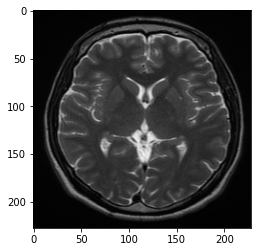

true_label 0
preditect_label 1
y_test [1. 0.]
predict_test [0. 1.]


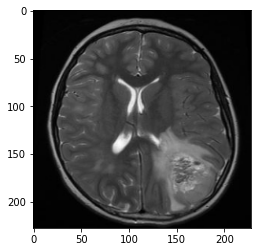

true_label 1
preditect_label 1
y_test [0. 1.]
predict_test [0. 1.]


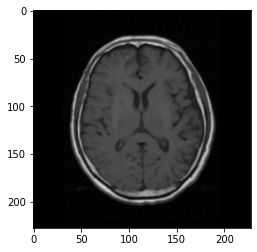

true_label 0
preditect_label 1
y_test [1. 0.]
predict_test [0. 1.]


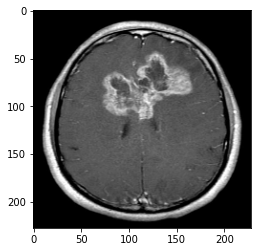

true_label 0
preditect_label 1
y_test [1. 0.]
predict_test [2.9964352e-38 1.0000000e+00]


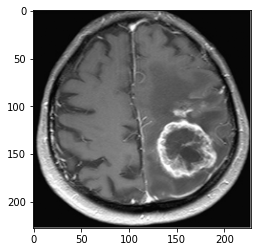

In [25]:
for i in range(5):
    img = x_test[i]
    true_label = y_true[i]
    preditect_label = max_pred[i]
    print ('true_label',true_label)
    print ('preditect_label',preditect_label)
    
    print ('y_test',y_test[i])
    print ('predict_test',predict_test[i])
    plt.imshow(img)
    plt.show()